In [1]:
#Importing the relevant libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sb
import matplotlib.pyplot as plt

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1359 entries, 0 to 1358
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              1359 non-null   int64  
 1   Name                    1359 non-null   object 
 2   Brand                   1359 non-null   object 
 3   Model                   1359 non-null   object 
 4   Battery capacity (mAh)  1359 non-null   int64  
 5   Screen size (inches)    1359 non-null   float64
 6   Touchscreen             1359 non-null   object 
 7   Resolution x            1359 non-null   int64  
 8   Resolution y            1359 non-null   int64  
 9   Processor               1359 non-null   int64  
 10  RAM (MB)                1359 non-null   int64  
 11  Internal storage (GB)   1359 non-null   float64
 12  Rear camera             1359 non-null   float64
 13  Front camera            1359 non-null   float64
 14  Operating system        1359 non-null   

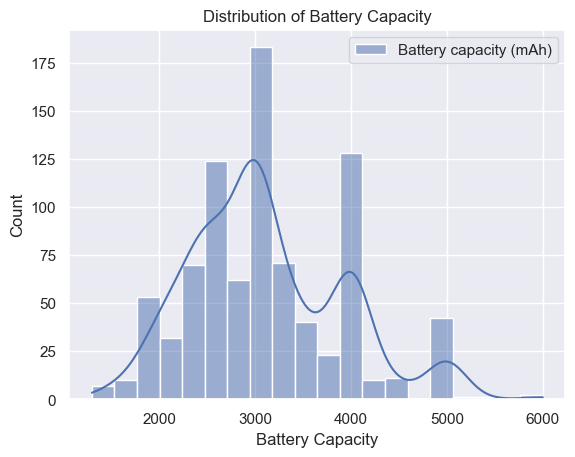

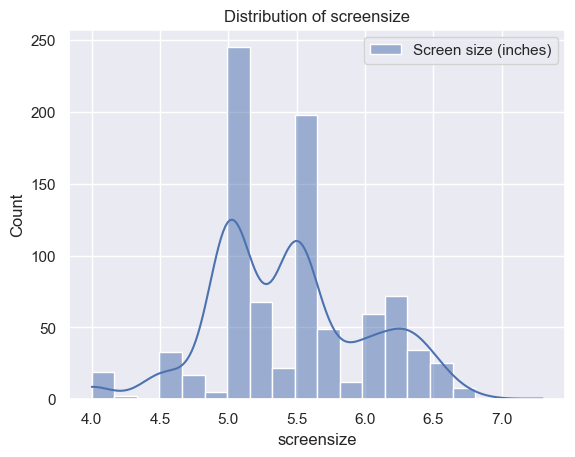

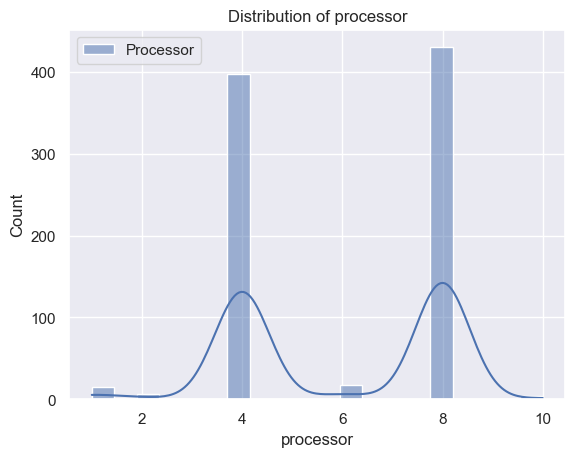

Number of Unique Values for Processor: 6
Unique Processors:
[ 8  6  1  4 10  2]


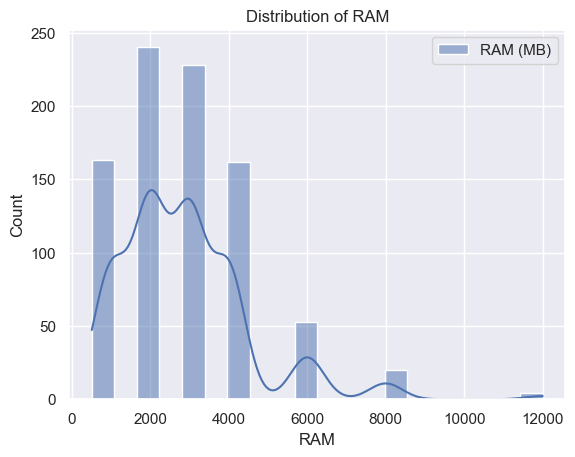

Number of Unique Values for RAMs: 9
Unique RAMs:
[12000  6000  4000  8000  3000  2000  1000   512   768]


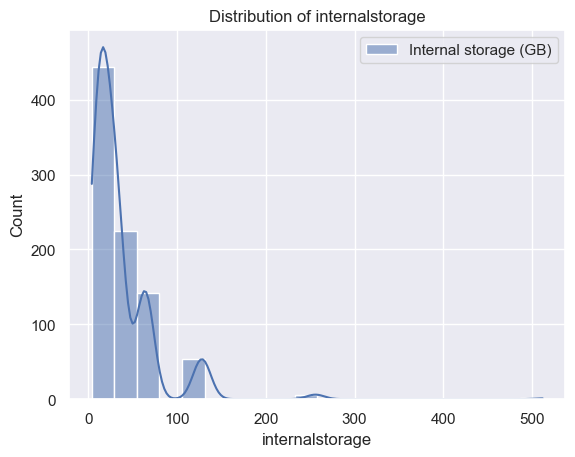

Number of Unique Values for Internal storage: 8
Unique Internal storage:
[256.  64. 128.  32.  16.   8. 512.   4.]


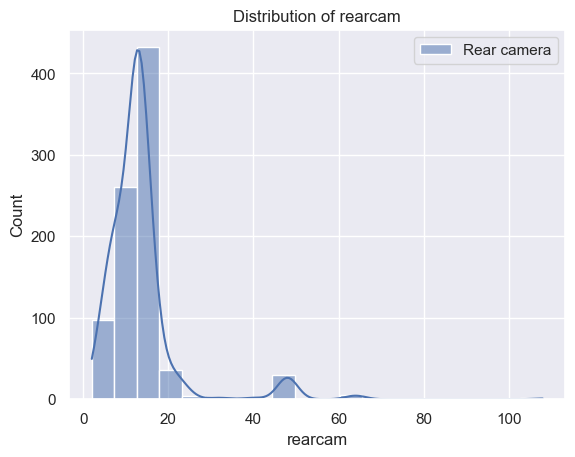

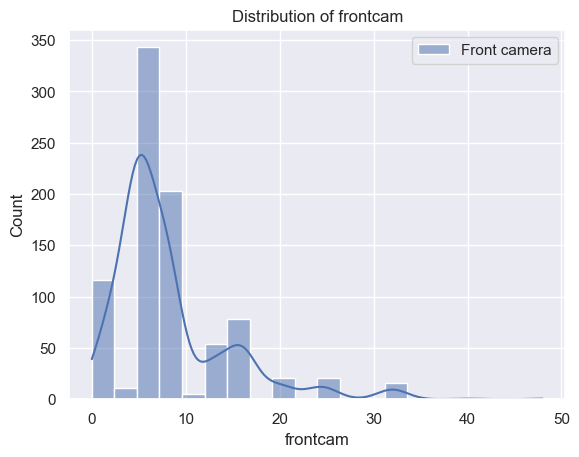

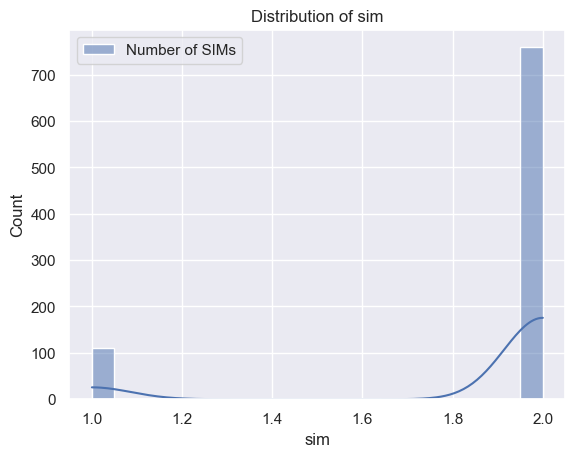

Number of Unique Values for SIMs: 2
Unique Number of SIMs:
[2 1]


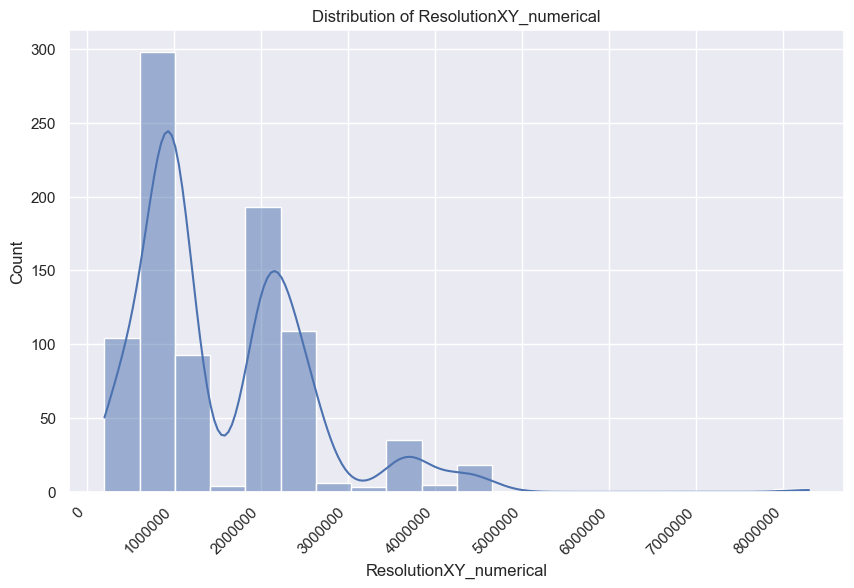

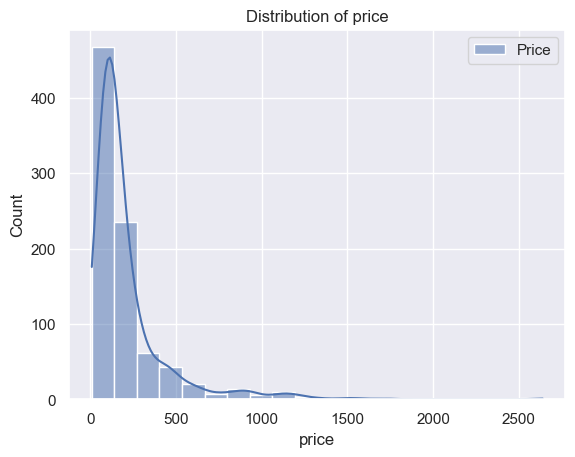

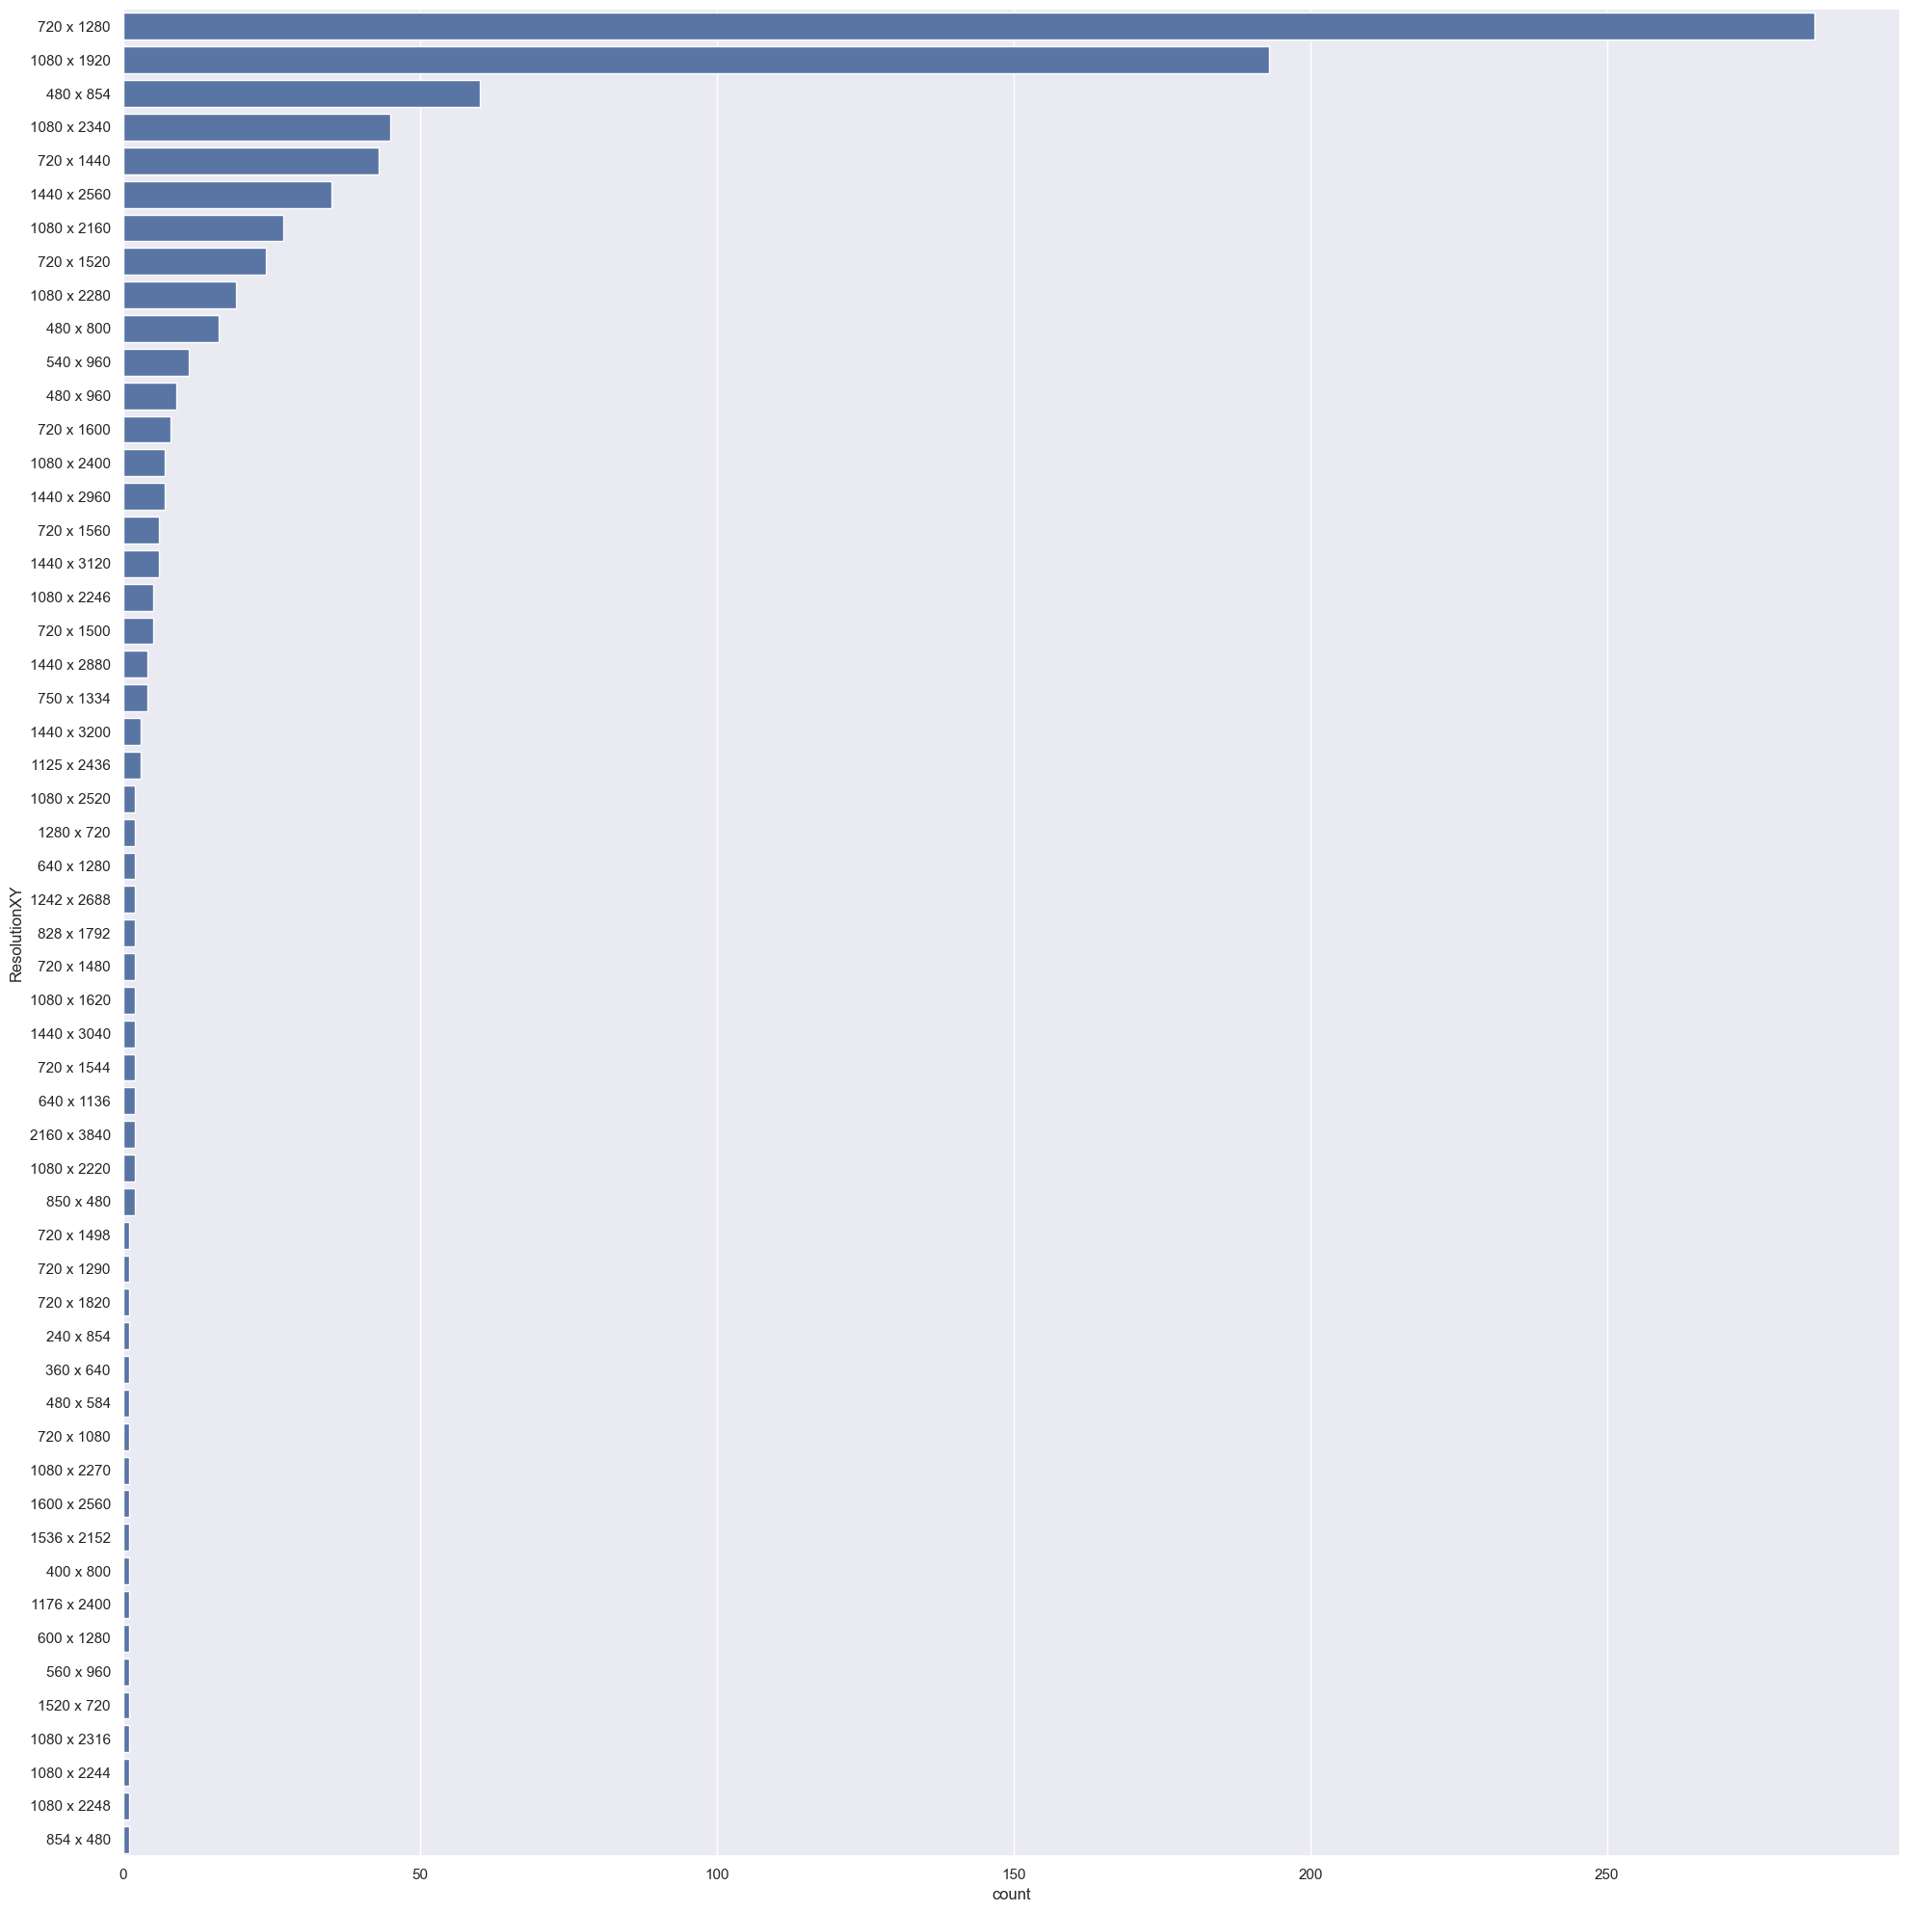

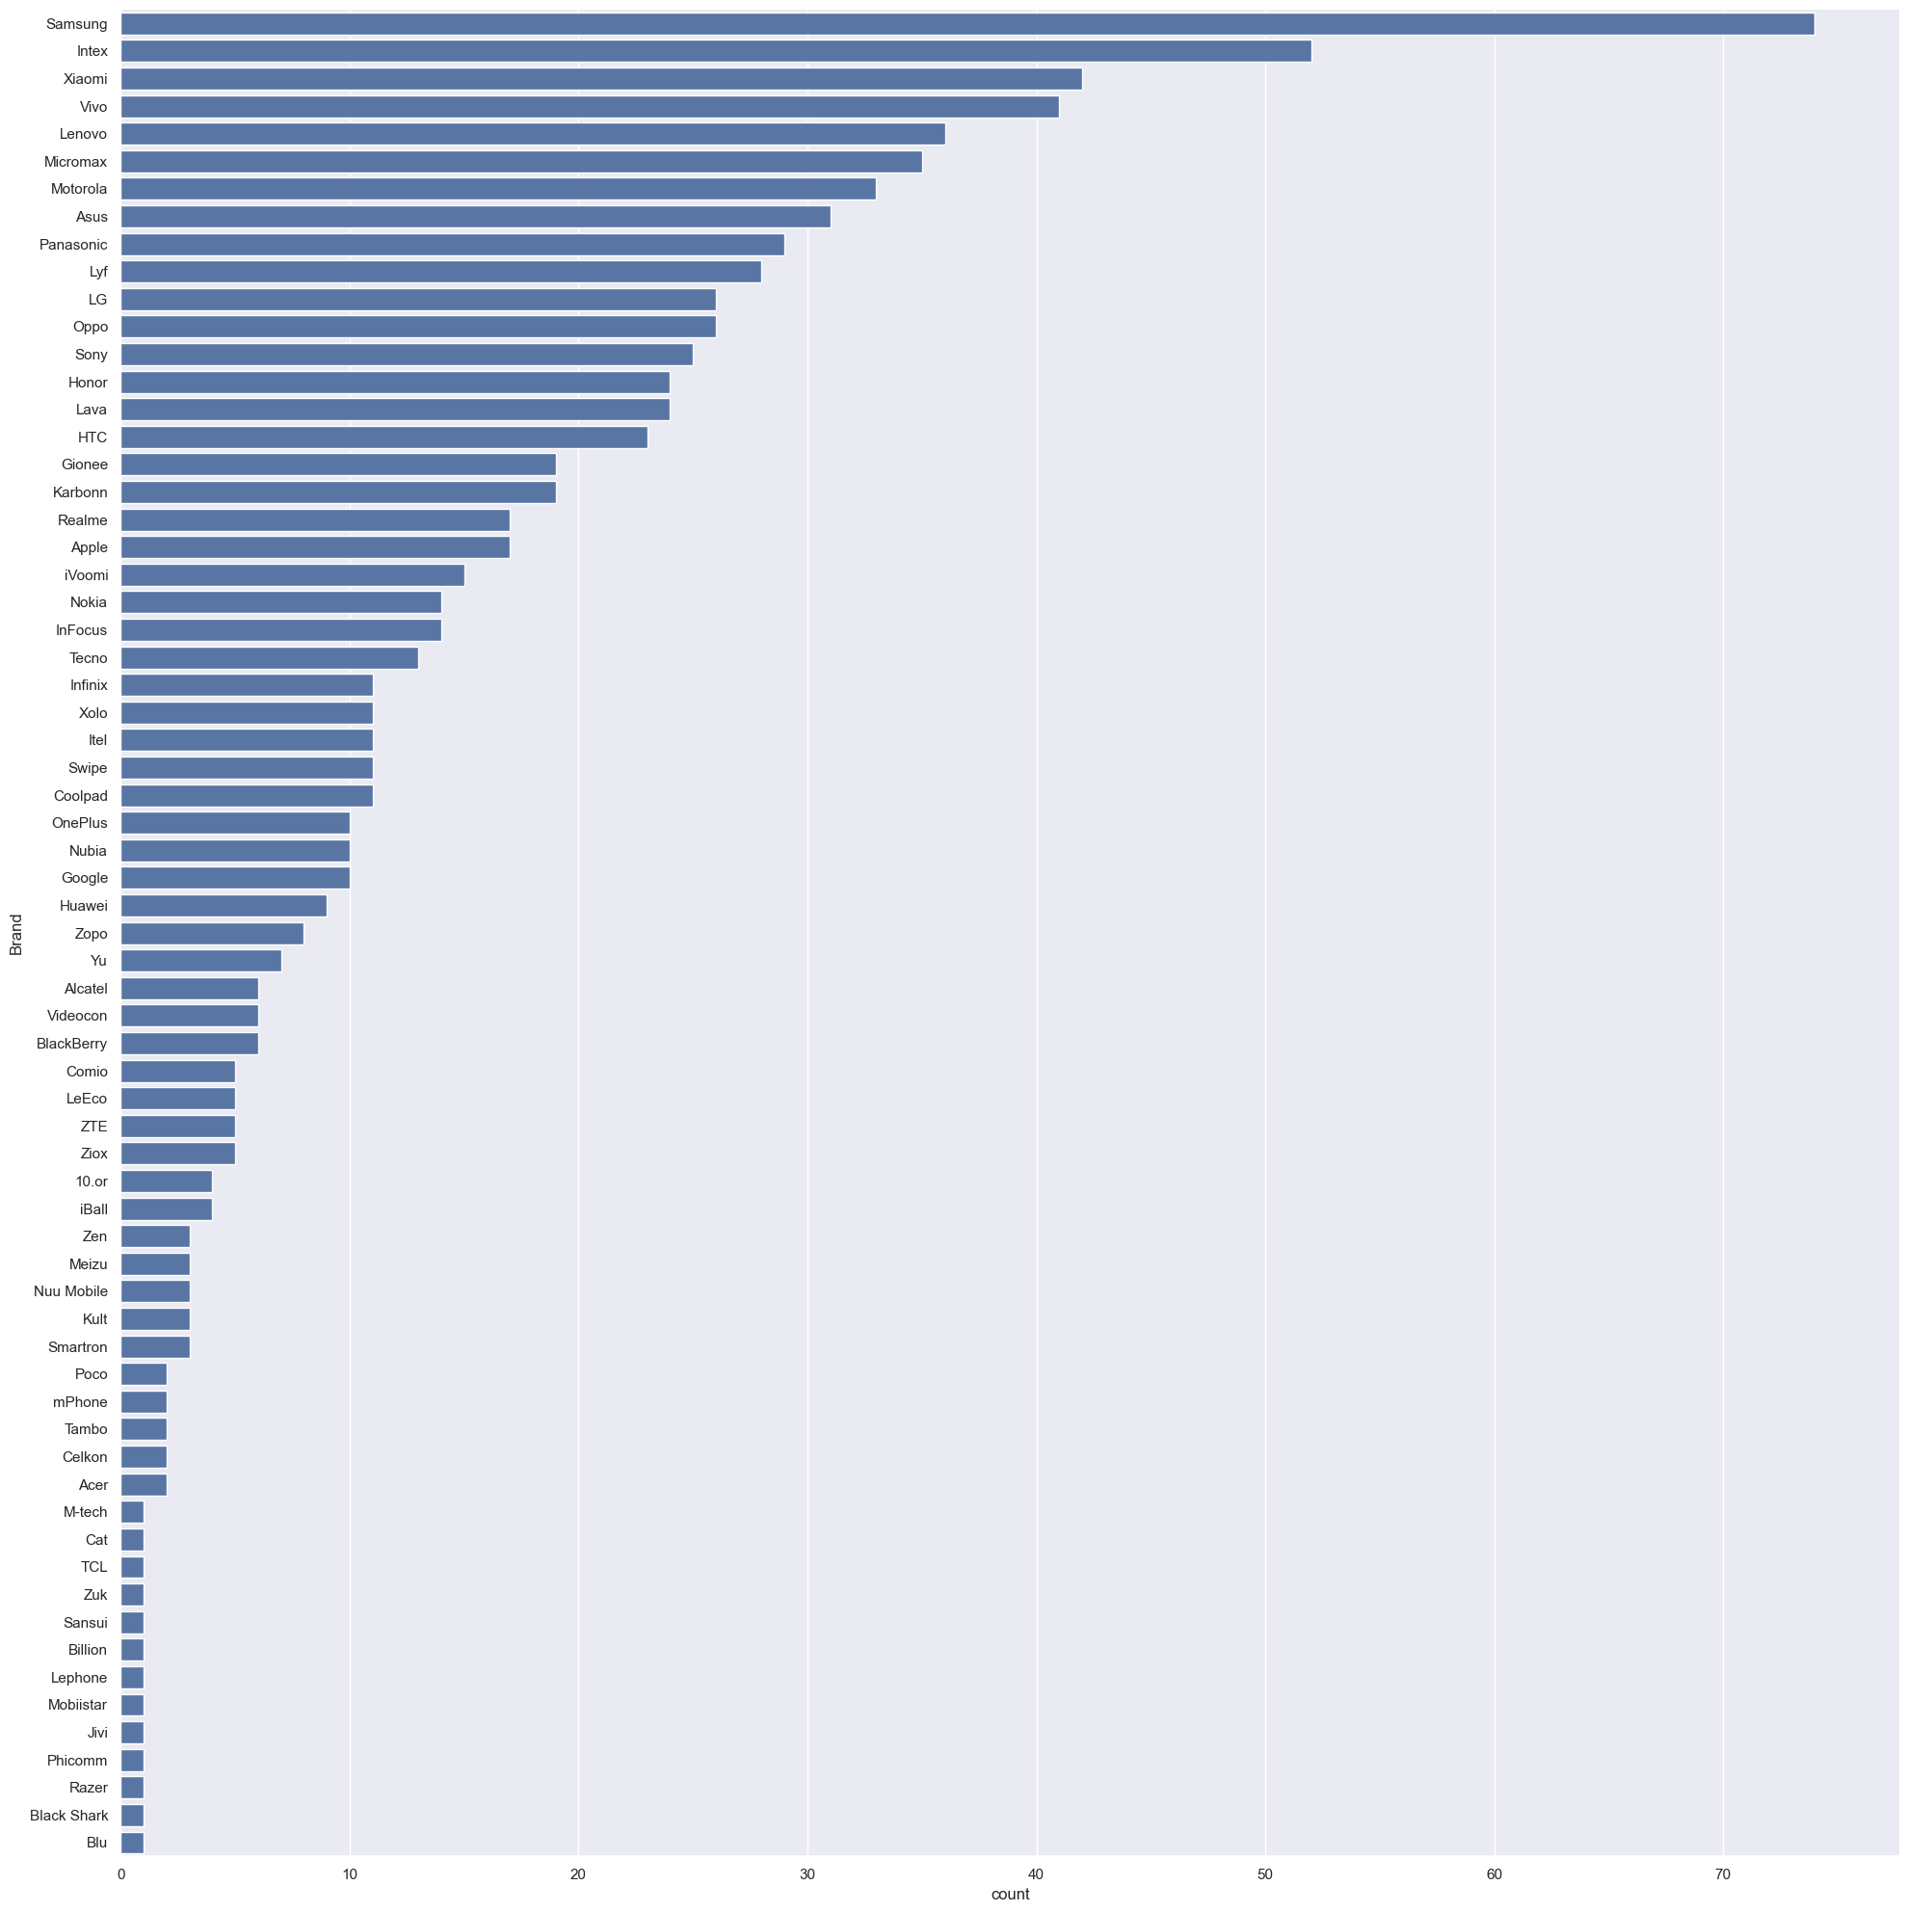

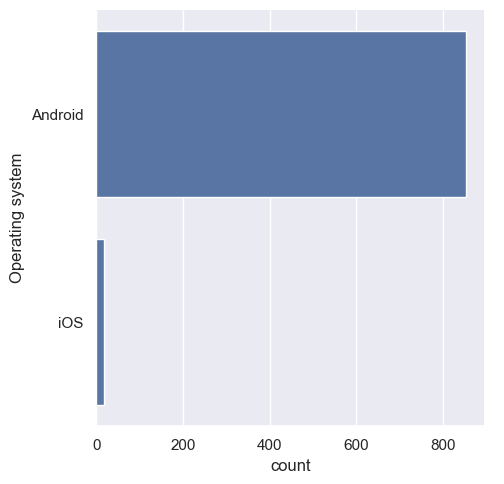

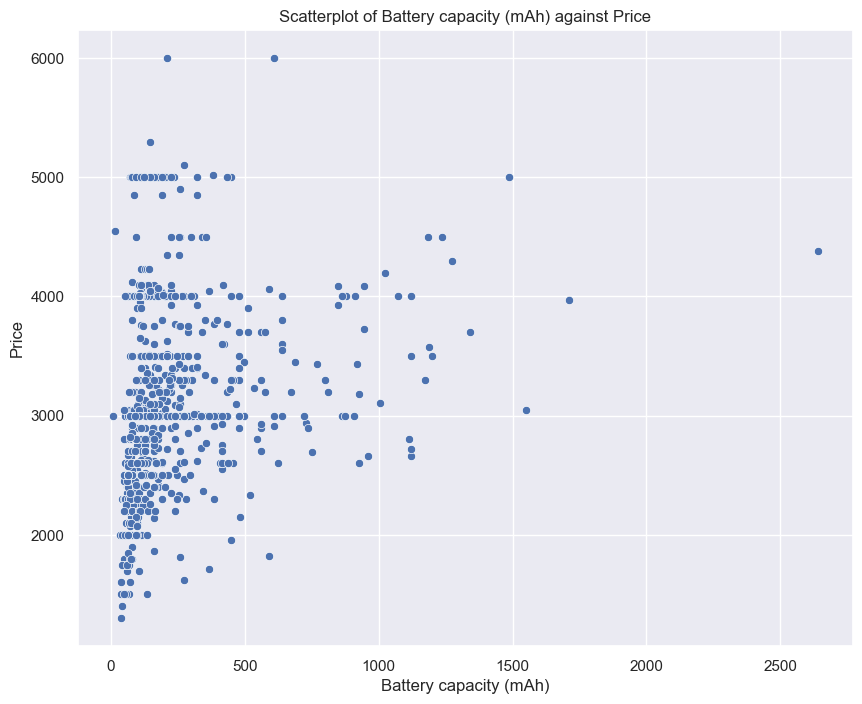

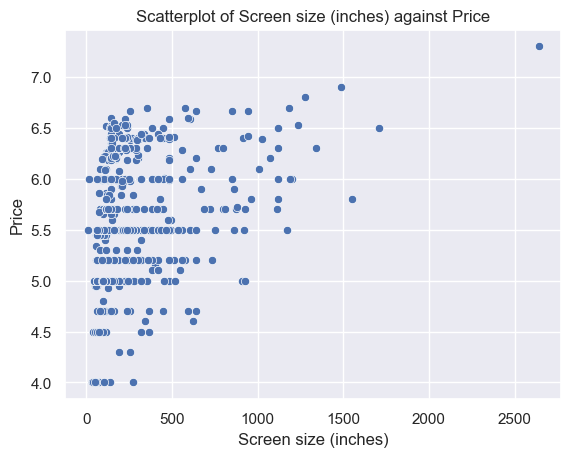

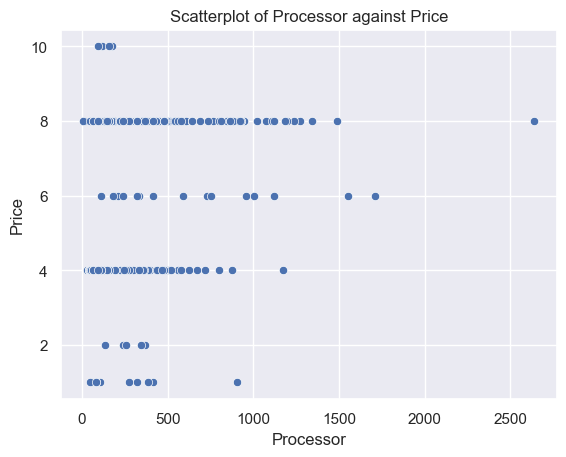

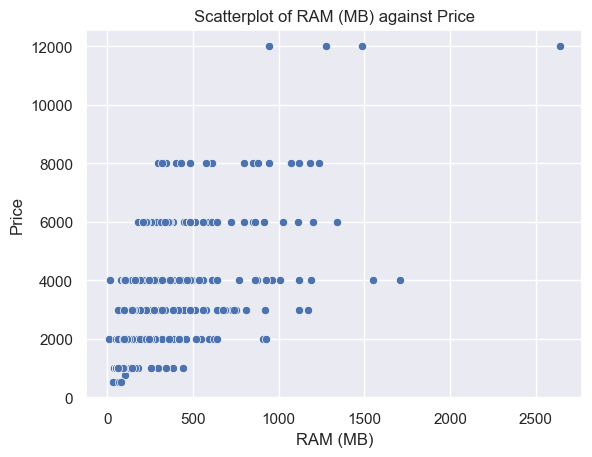

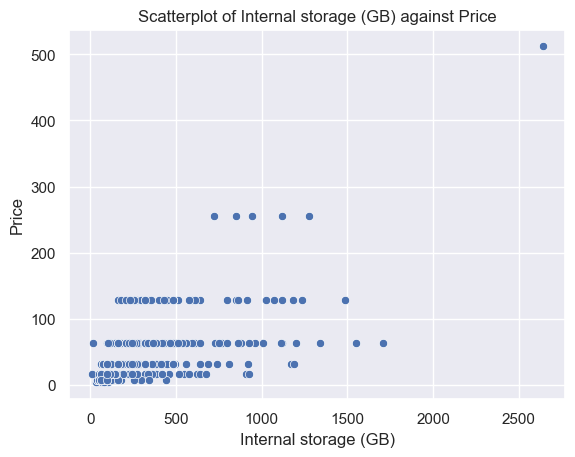

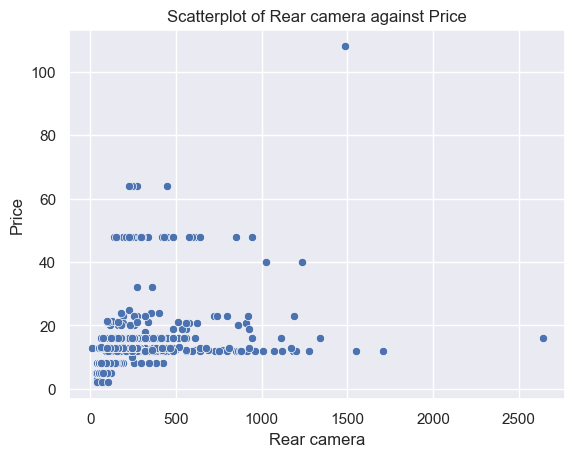

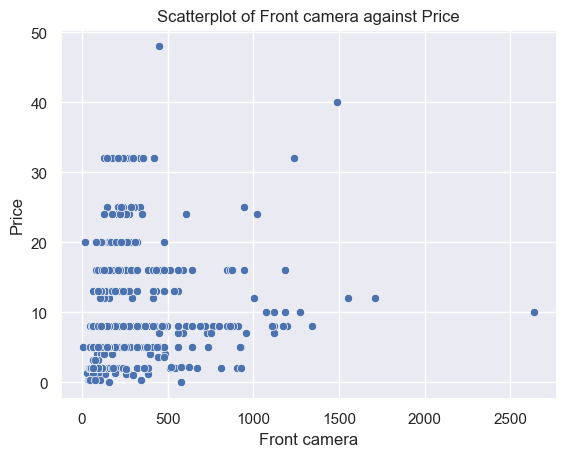

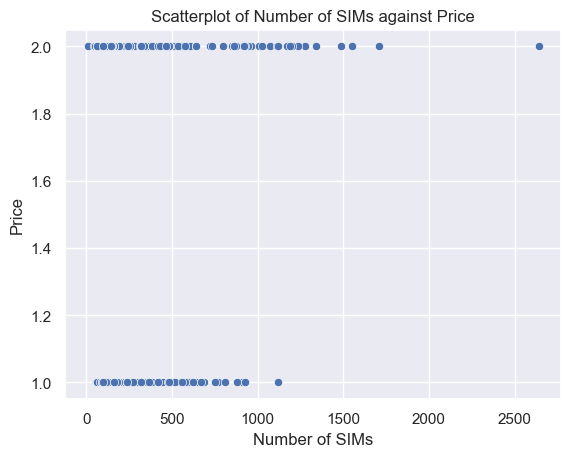

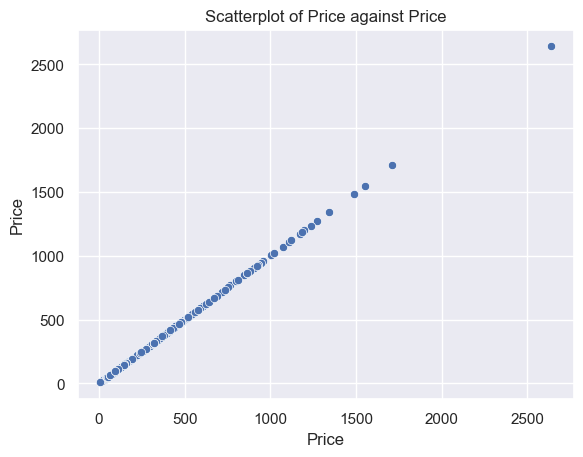

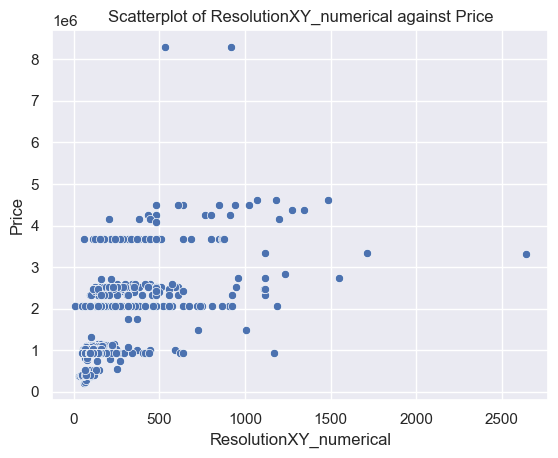

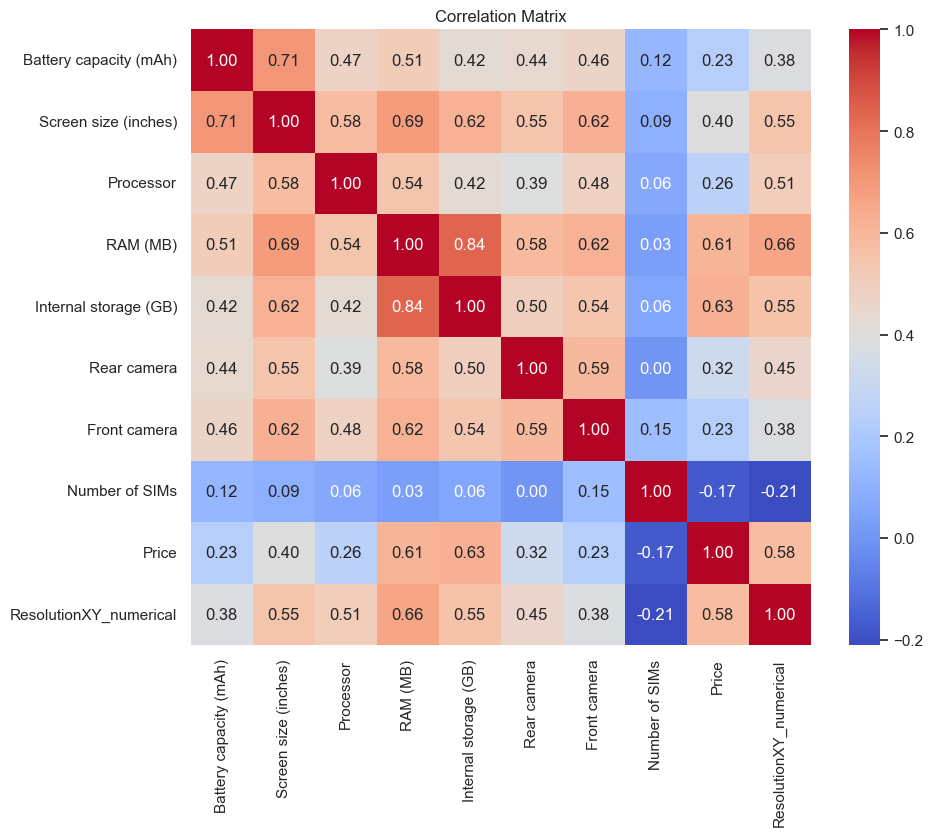

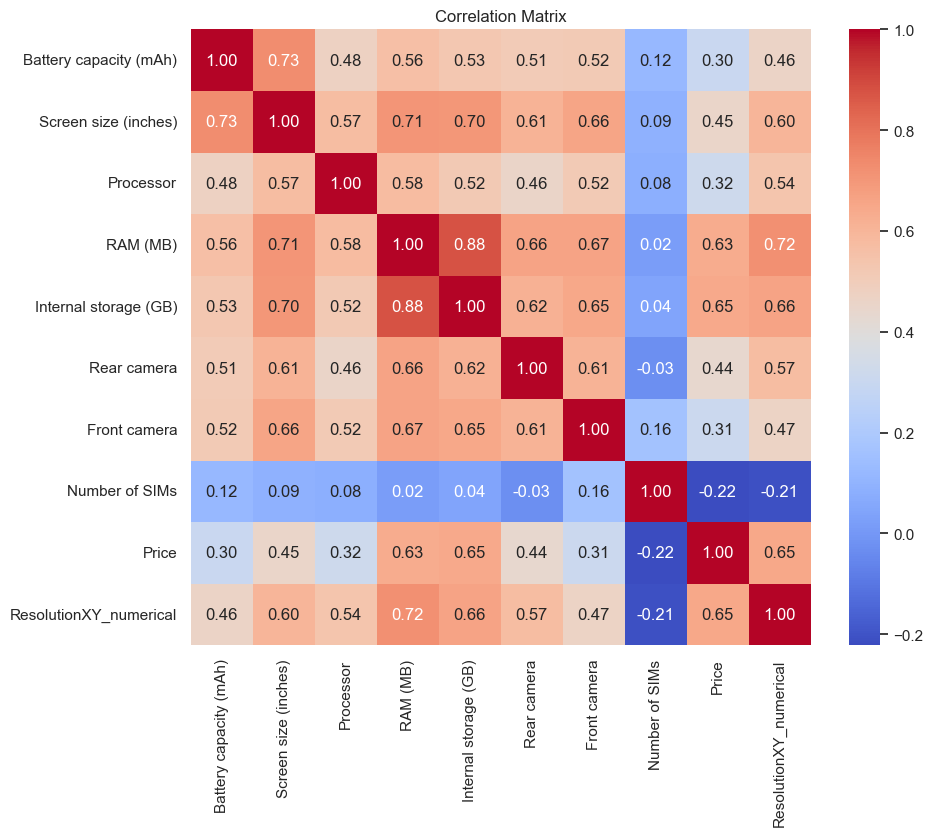

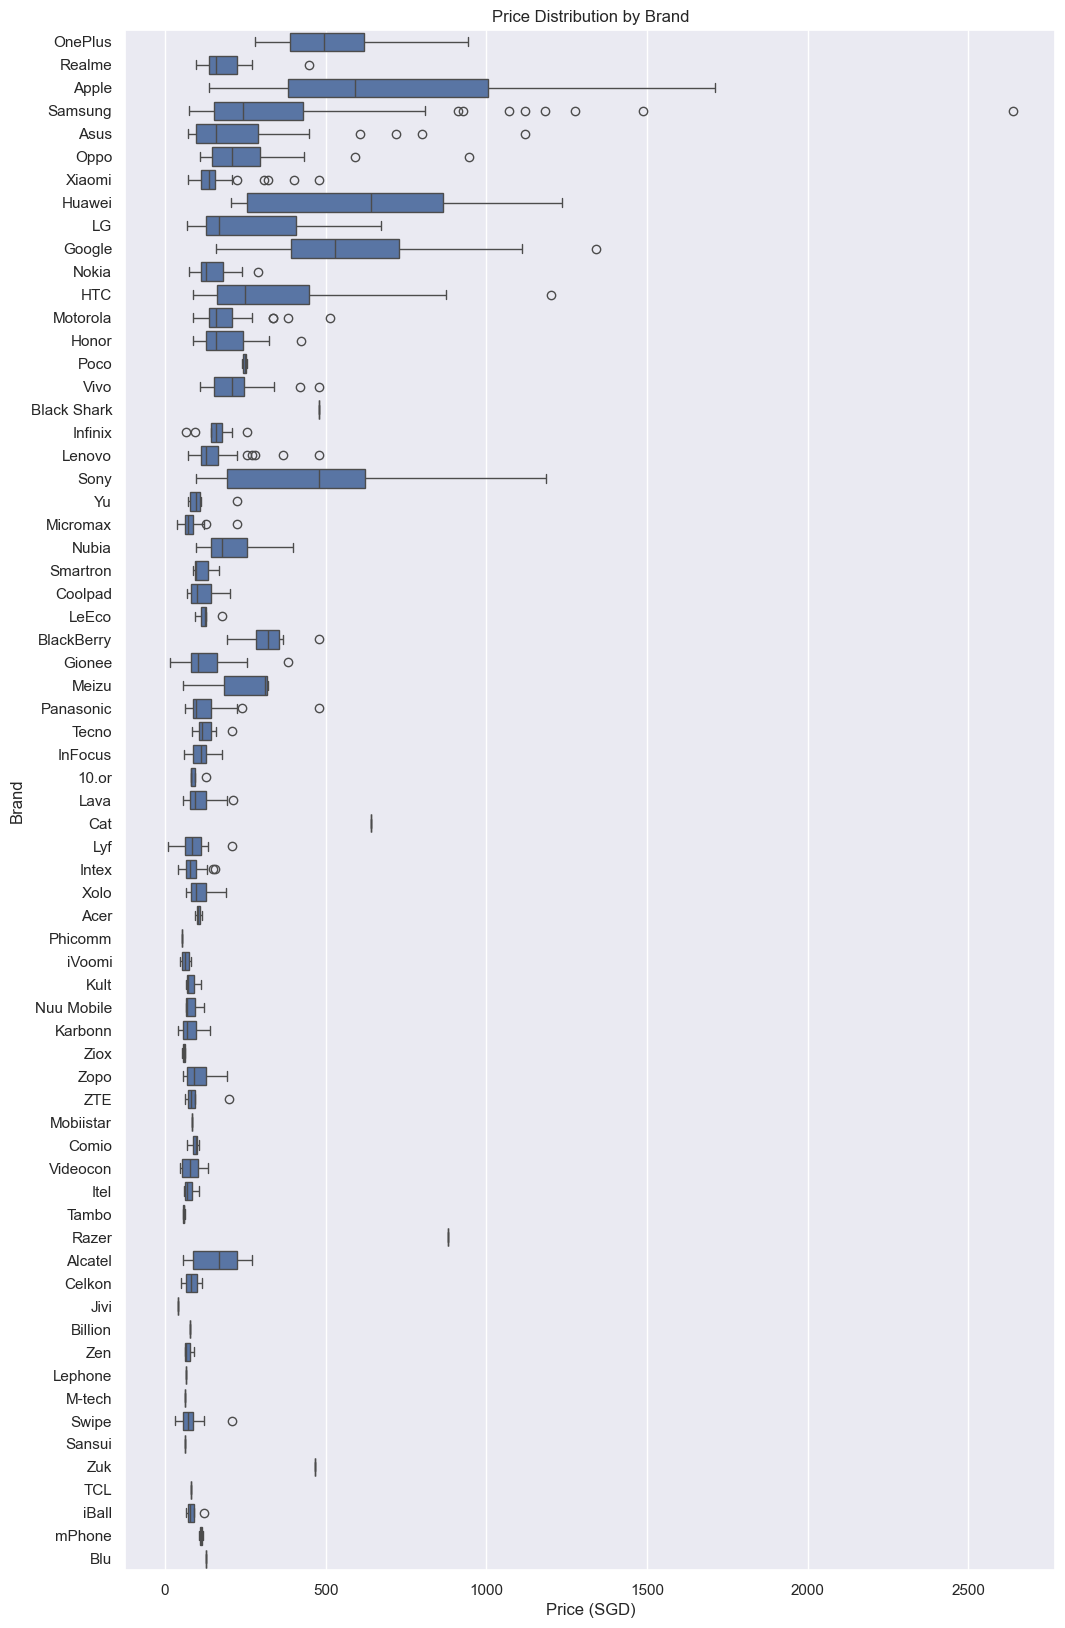

/var/folders/_g/b8hx2hl17v50dk_ptwsq4hv00000gn/T/ipykernel_17273/3113305737.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x=sorted_brands.values, y=sorted_brands.index, palette='Set1')


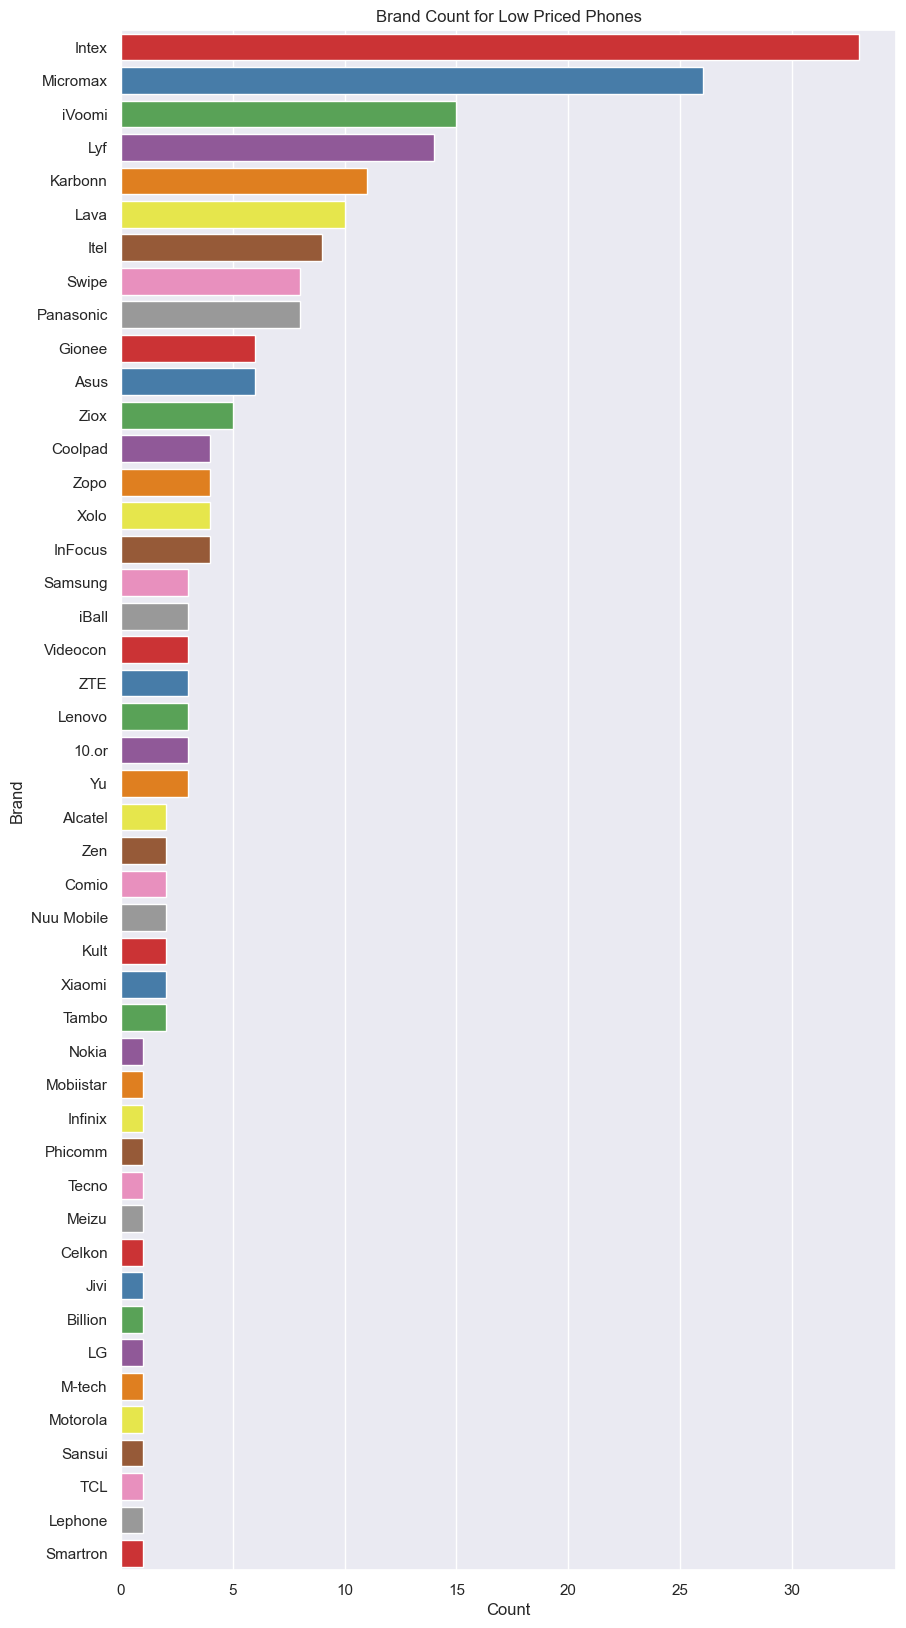

/var/folders/_g/b8hx2hl17v50dk_ptwsq4hv00000gn/T/ipykernel_17273/4189486928.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x=sorted_brands.values, y=sorted_brands.index, palette='Set1')


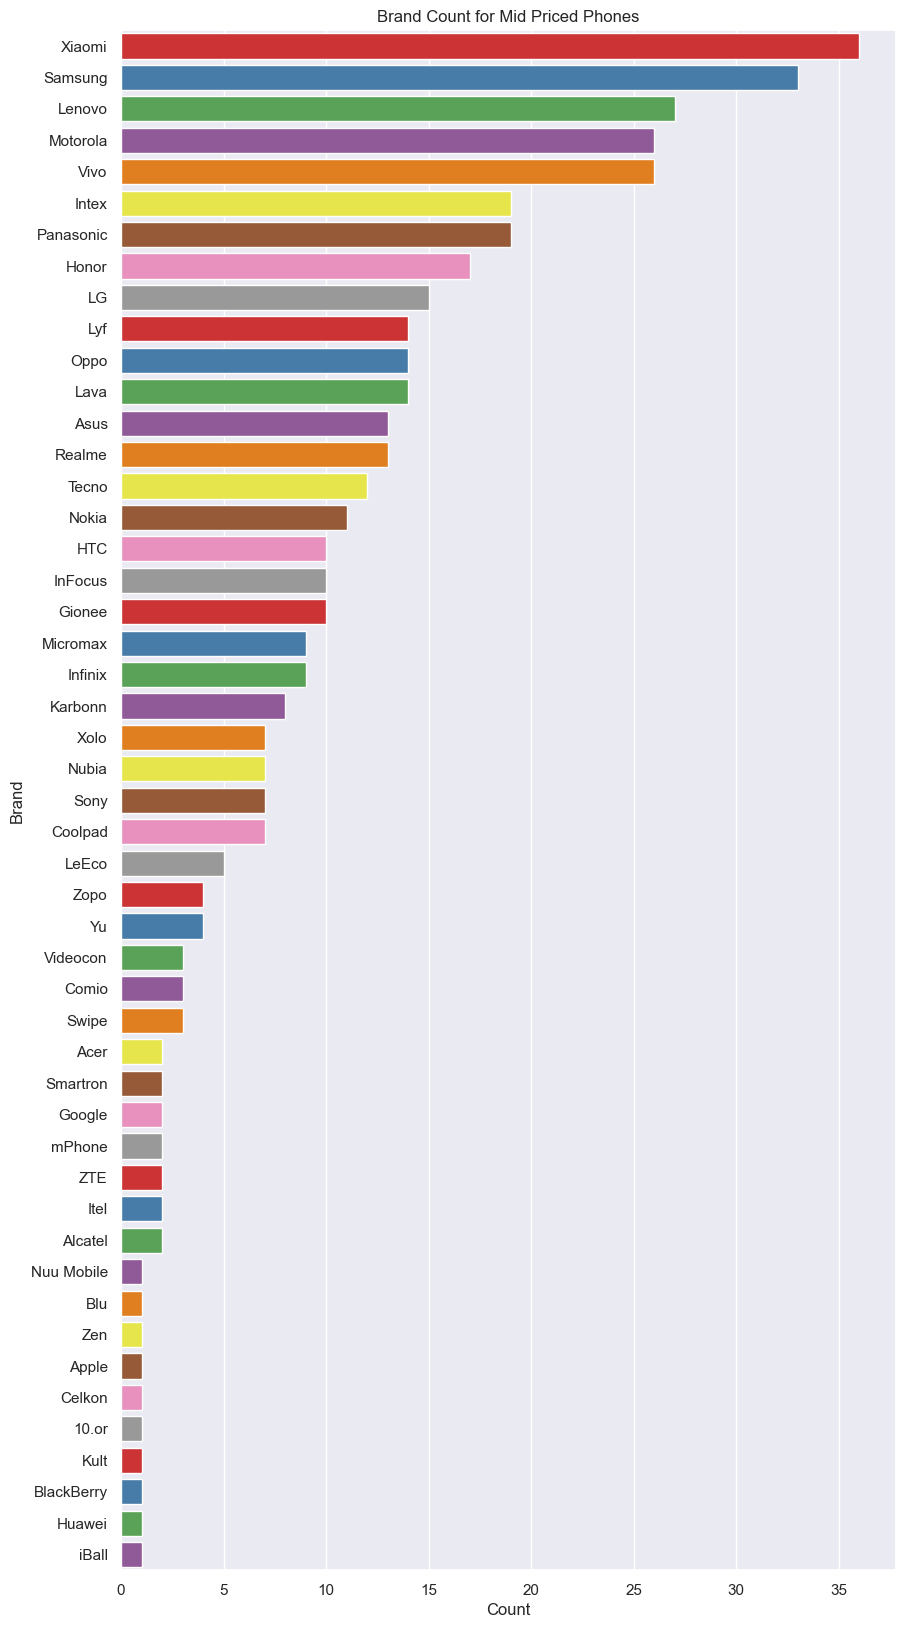

/var/folders/_g/b8hx2hl17v50dk_ptwsq4hv00000gn/T/ipykernel_17273/5628291.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x=sorted_brands.values, y=sorted_brands.index, palette='Set1')


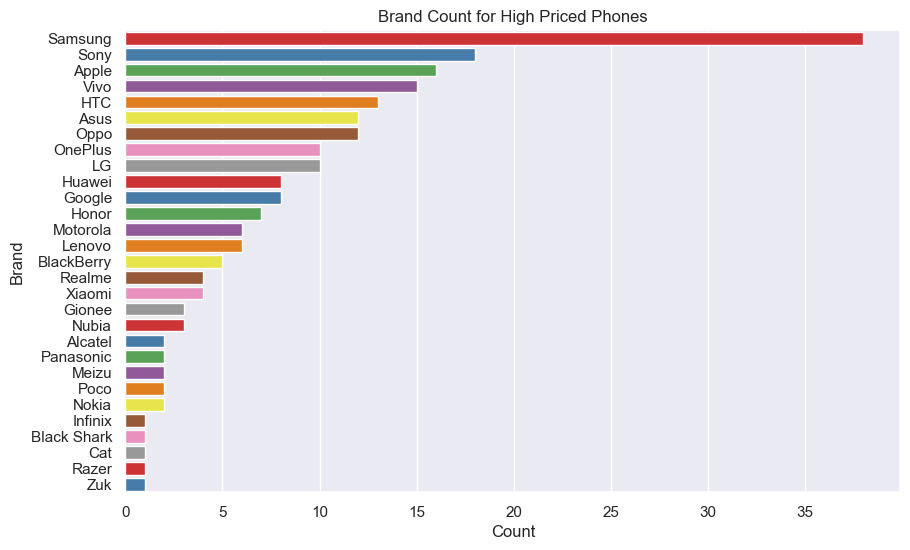

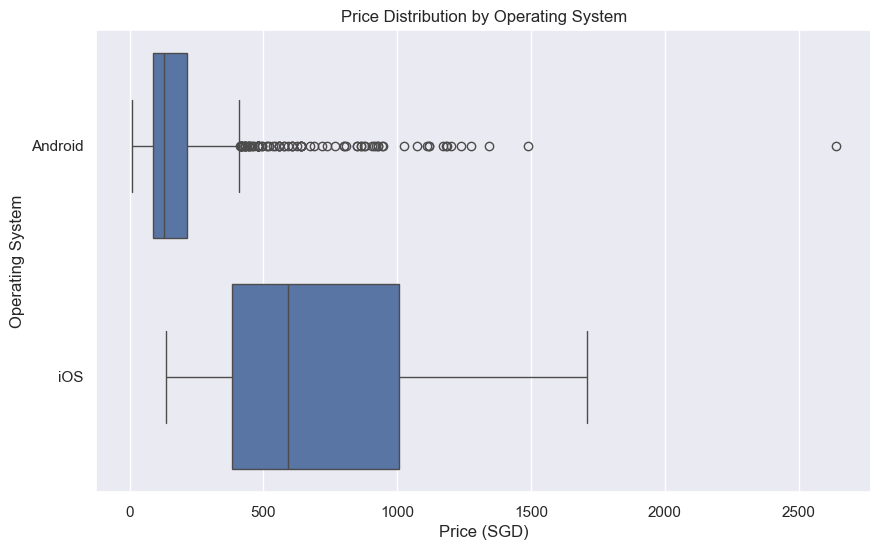

In [2]:
%run Extraction_And_EDA.ipynb

In [3]:
#Choose the data that we are selecting to rows we decided
X = mData[['Brand', 'RAM (MB) norm ', 'Internal storage (GB) norm', 'ResolutionXY_numerical norm']].values
y = mData['Price'].values

#change categorical to numerical
encoder = OneHotEncoder(sparse_output=False)
brand_encoded = encoder.fit_transform(X[:, 0].reshape(-1, 1))
X = np.concatenate([brand_encoded, X[:, 1:]], axis=1)

#Testing the data to initially guess the price of the phone 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Preprocess the data for price category prediction
X = mData[['Brand', 'RAM (MB) norm ', 'Internal storage (GB) norm', 'ResolutionXY_numerical norm']].values
y_category = mData['Price_Category'].values

#change categorical to numerical
encoder = OneHotEncoder(sparse_output=False)
brand_encoded = encoder.fit_transform(X[:, 0].reshape(-1, 1))
X = np.concatenate([brand_encoded, X[:, 1:]], axis=1)

#train it to guess the price category of the phone
X_train, X_test, y_train_category, y_test_category = train_test_split(X, y_category, test_size=0.2, random_state=42)

# Standardize the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Encode the string labels into numerical categories
label_encoder = LabelEncoder()
y_train_category_encoded = label_encoder.fit_transform(y_train_category)
y_test_category_encoded = label_encoder.transform(y_test_category)

# Build the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(40, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(28, activation='relu'),
    tf.keras.layers.Dense(25, activation='relu'),
    tf.keras.layers.Dense(21, activation='relu'),
    tf.keras.layers.Dense(11, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')  # Output layer for three price categories
])

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'],optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0005))

# Train the model
history = model.fit(X_train_scaled, y_train_category_encoded, epochs= 27, batch_size=64, validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test_category_encoded)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

# Make predictions
predictions = model.predict(X_test_scaled)

# Compute evaluation metrics
accuracy = accuracy_score(y_test_category_encoded, np.argmax(predictions, axis=1))
print(f'Accuracy: {accuracy}')

Epoch 1/27


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5048 - loss: 1.0743 - val_accuracy: 0.5429 - val_loss: 1.0619
Epoch 2/27
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5178 - loss: 1.0580 - val_accuracy: 0.5500 - val_loss: 1.0459
Epoch 3/27
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5153 - loss: 1.0449 - val_accuracy: 0.5571 - val_loss: 1.0306
Epoch 4/27
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5246 - loss: 1.0204 - val_accuracy: 0.5571 - val_loss: 1.0153
Epoch 5/27
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5278 - loss: 1.0081 - val_accuracy: 0.5571 - val_loss: 0.9981
Epoch 6/27
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5484 - loss: 0.9922 - val_accuracy: 0.5643 - val_loss: 0.9801
Epoch 7/27
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5506 - loss: 0.9667 - val_accuracy: 0.5786 - val_loss: 0.9628
Epoch 8/27
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5523 - loss: 0.9769 - val_accuracy: 0.5929 - val_loss: 0.9448
Epoch 9/27
9/9 ━━━━

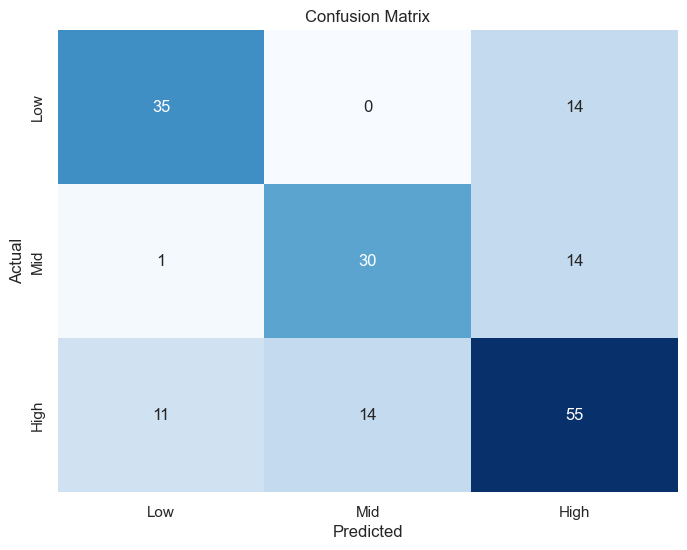

In [5]:
# Plot confusion matrix with custom class labels
class_labels = ['Low', 'Mid', 'High']
conf_matrix = confusion_matrix(y_test_category_encoded, np.argmax(predictions, axis=1))
plt.figure(figsize=(8, 6))
sb.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False, xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [6]:
# Initialize lists to store TPR, FPR, FNR, and TNR for each tier
tpr_tier_list = []
fpr_tier_list = []
fnr_tier_list = []
tnr_tier_list = []

# Define indices for each tier
low_price_indices = [0]
mid_price_indices = [1]
high_price_indices = [2]

# Compute TPR, FPR, FNR, and TNR for each tier
for tier_indices in [low_price_indices, mid_price_indices, high_price_indices]:
    # True positives: sum of diagonal elements (TP)
    TP = np.sum(conf_matrix[tier_indices, tier_indices])
    # False negatives: sum of row elements excluding TP (FN)
    FN = np.sum(conf_matrix[tier_indices, :]) - TP
    # False positives: sum of column elements excluding TP (FP)
    FP = np.sum(conf_matrix[:, tier_indices]) - TP
    # True negatives: sum of all elements excluding TP, FN, FP (TN)
    TN = np.sum(conf_matrix) - TP - FN - FP
    
    # Compute TPR, FPR, FNR, and TNR
    TPR = TP / (TP + FN)
    FPR = FP / (FP + TN)
    FNR = FN / (TP + FN)
    TNR = TN / (FP + TN)
    
    # Append TPR, FPR, FNR, and TNR to lists
    tpr_tier_list.append(TPR)
    fpr_tier_list.append(FPR)
    fnr_tier_list.append(FNR)
    tnr_tier_list.append(TNR)

# Print rates for each tier
tier_labels = ['Low Price', 'Mid Price', 'High Price']
for tier, (TPR, FPR, FNR, TNR) in zip(tier_labels, zip(tpr_tier_list, fpr_tier_list, fnr_tier_list, tnr_tier_list)):
    print(f'{tier}: TPR = {TPR}, FPR = {FPR}, FNR = {FNR}, TNR = {TNR}')

Low Price: TPR = 0.7142857142857143, FPR = 0.096, FNR = 0.2857142857142857, TNR = 0.904
Mid Price: TPR = 0.6666666666666666, FPR = 0.10852713178294573, FNR = 0.3333333333333333, TNR = 0.8914728682170543
High Price: TPR = 0.6875, FPR = 0.2978723404255319, FNR = 0.3125, TNR = 0.7021276595744681


In [7]:
#function to calculate the overall fpr and tpr

def calculate_tpr_fpr(conf_matrix):
    # Convert the confusion matrix to a floating-point array
    conf_matrix_float = conf_matrix.astype(float)
    
    # Compute True Positive (TP) for the entire matrix
    TP = np.sum(np.diag(conf_matrix_float))
    
    # Compute False Positive (FP) for the entire matrix
    FP = np.sum(conf_matrix_float, axis=0) - np.diag(conf_matrix_float)
    
    # Summing the FP counts for all classes
    FP_total = np.sum(FP)
    
    # Calculate the number of negative instances (actual negatives)
    negatives_total = np.sum(conf_matrix_float) - TP
    
    # Compute True Positive Rate (TPR)
    TPR = TP / (TP + negatives_total)
    
    # Compute False Positive Rate (FPR)
    FPR = FP_total / (FP_total + TP)
    
    return TPR, FPR
    
TPR, FPR = calculate_tpr_fpr(conf_matrix)
print(f'True Positive Rate (TPR) for the entire matrix: {TPR}')
print(f'False Positive Rate (FPR) for the entire matrix: {FPR}')

True Positive Rate (TPR) for the entire matrix: 0.6896551724137931
False Positive Rate (FPR) for the entire matrix: 0.3103448275862069
